The PISA (Program for International Student Assessment) dataset provides insight into the
educational performance of 15-year-olds worldwide. This project aims to analyze various
factors influencing students' reading scores

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno   #visualizating missing data
from scipy.stats import ttest_ind, f_oneway
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style = 'whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [48]:
df = pd.read_csv('/content/pisa2009test.csv')

In [49]:
df.head()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,10,0,White,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,240.0,30.0,1.0,1,0,808.0,355.24
1,10,1,White,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,255.0,NaN,1.0,1,0,808.0,385.57
2,10,0,White,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,NaN,30.0,1.0,1,0,808.0,522.62
3,10,0,White,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,160.0,30.0,NaN,1,0,808.0,406.24
4,10,0,White,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,240.0,30.0,1.0,1,0,808.0,453.50


In [50]:
df.info()
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   grade                  1570 non-null   int64  
 1   male                   1570 non-null   int64  
 2   raceeth                1557 non-null   object 
 3   preschool              1549 non-null   float64
 4   expectBachelors        1547 non-null   float64
 5   motherHS               1525 non-null   float64
 6   motherBachelors        1382 non-null   float64
 7   motherWork             1534 non-null   float64
 8   fatherHS               1445 non-null   float64
 9   fatherBachelors        1282 non-null   float64
 10  fatherWork             1457 non-null   float64
 11  selfBornUS             1546 non-null   float64
 12  motherBornUS           1547 non-null   float64
 13  fatherBornUS           1512 non-null   float64
 14  englishAtHome          1543 non-null   float64
 15  comp

In [51]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

<Axes: >

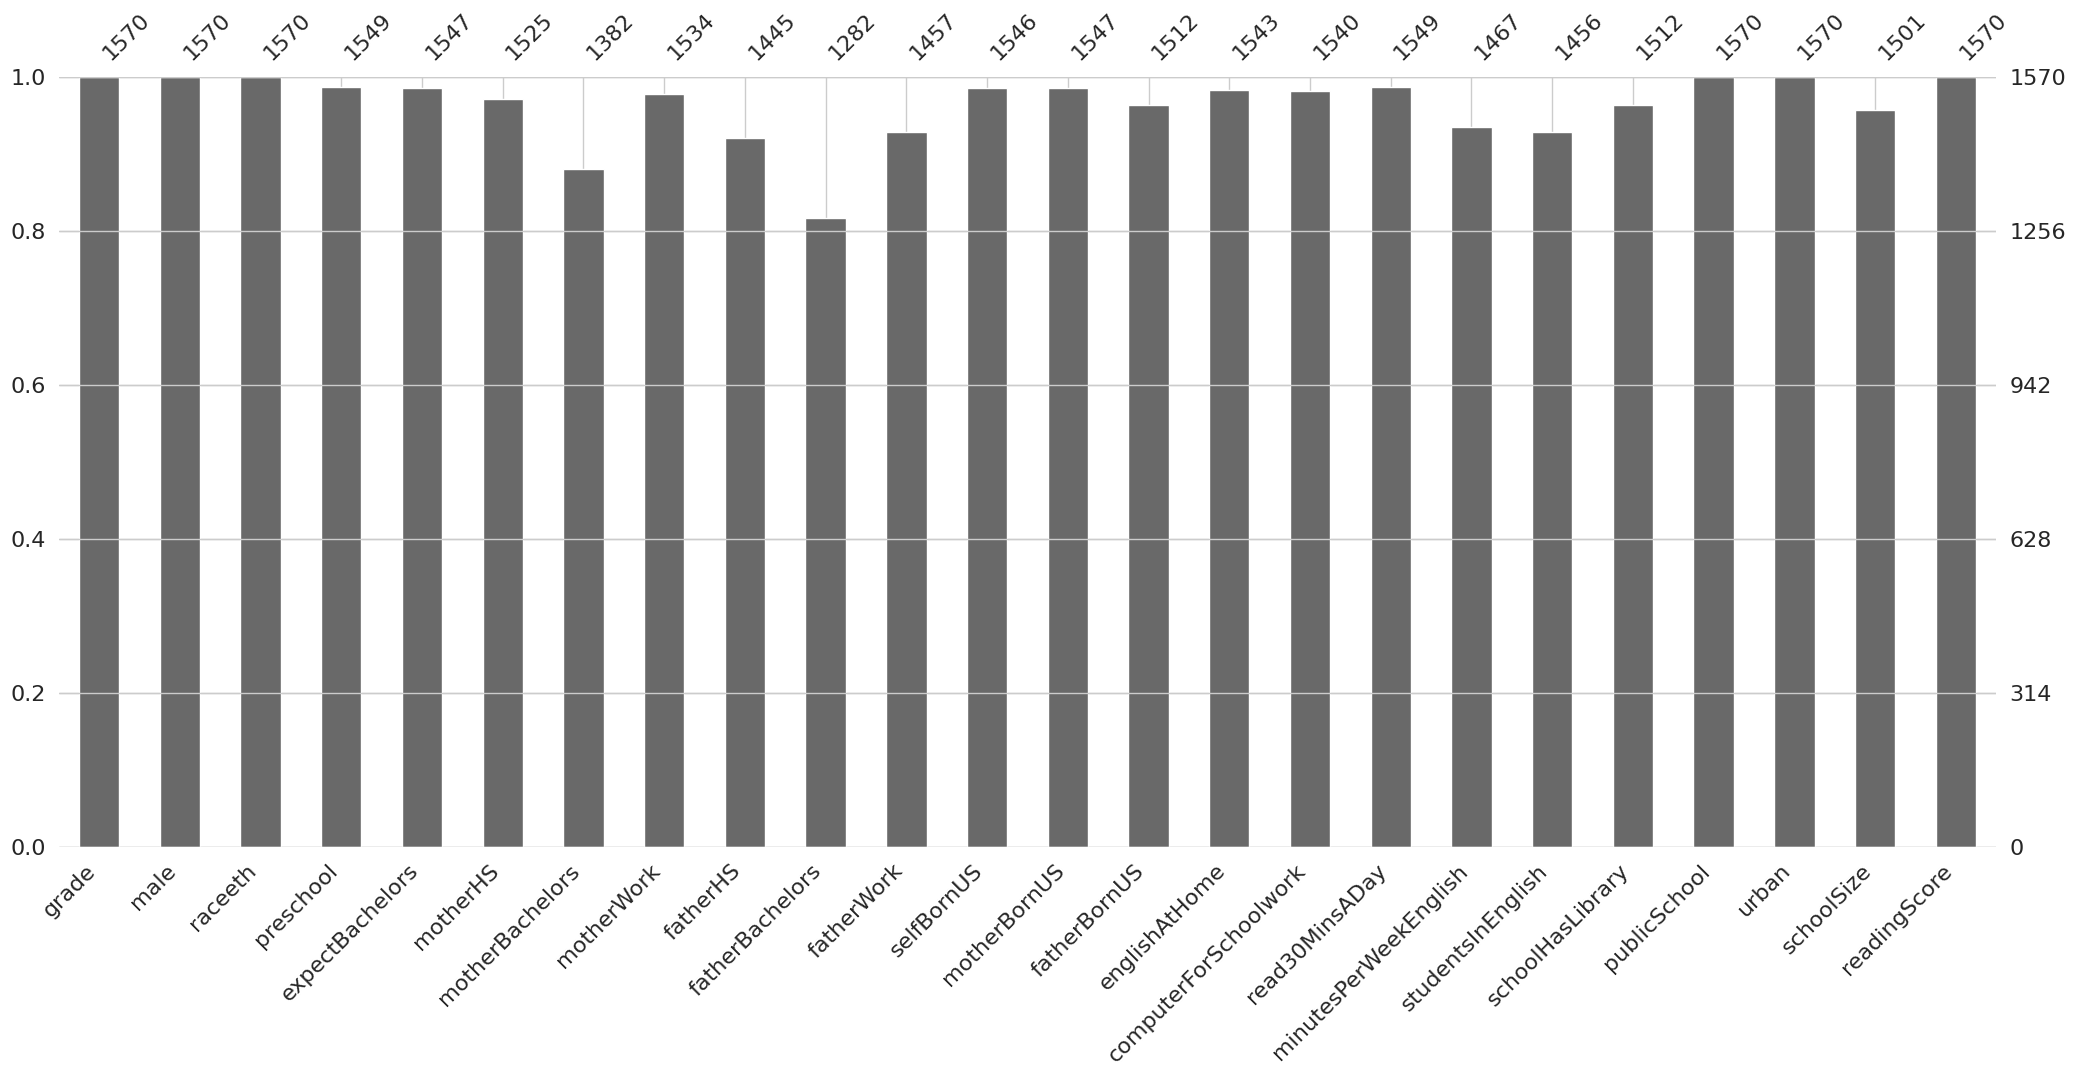

In [52]:
msno.bar(df)

In [53]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [54]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
             grade         male    preschool  expectBachelors     motherHS  \
count  1570.000000  1570.000000  1570.000000      1570.000000  1570.000000   
mean     10.094268     0.519108     0.714650         0.770701     0.871975   
std       0.548507     0.499794     0.451725         0.420516     0.334225   
min       9.000000     0.000000     0.000000         0.000000     0.000000   
25%      10.000000     0.000000     0.000000         1.000000     1.000000   
50%      10.000000     1.000000     1.000000         1.000000     1.000000   
75%      10.000000     1.000000     1.000000         1.000000     1.000000   
max      12.000000     1.000000     1.000000         1.000000     1.000000   

       motherBachelors   motherWork     fatherHS  fatherBachelors  \
count      1570.000000  1570.000000  1570.000000      1570.000000   
mean          0.291083     0.725478     0.860510         0.265605   
std           0.454406     0.446415     0.346568         0.441796   
m

In [55]:
reading_summary = df['readingScore'].describe()

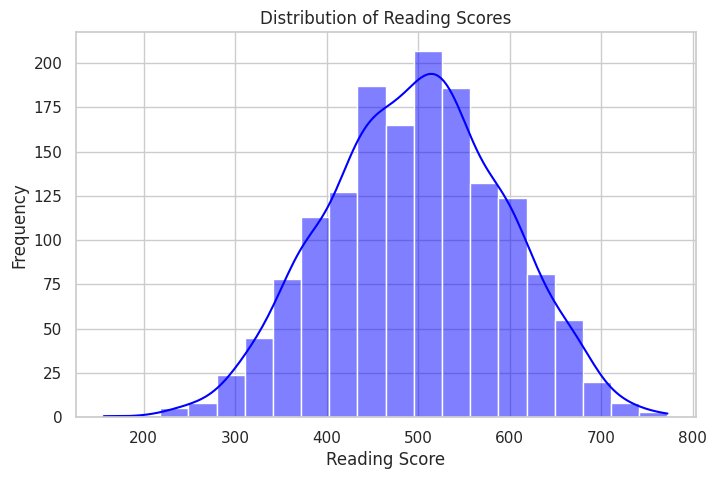

In [56]:
plt.figure(figsize=(8,5))
sns.histplot(df['readingScore'], bins=20, kde=True, color='blue')
plt.title("Distribution of Reading Scores")
plt.xlabel("Reading Score")
plt.ylabel("Frequency")
plt.show()

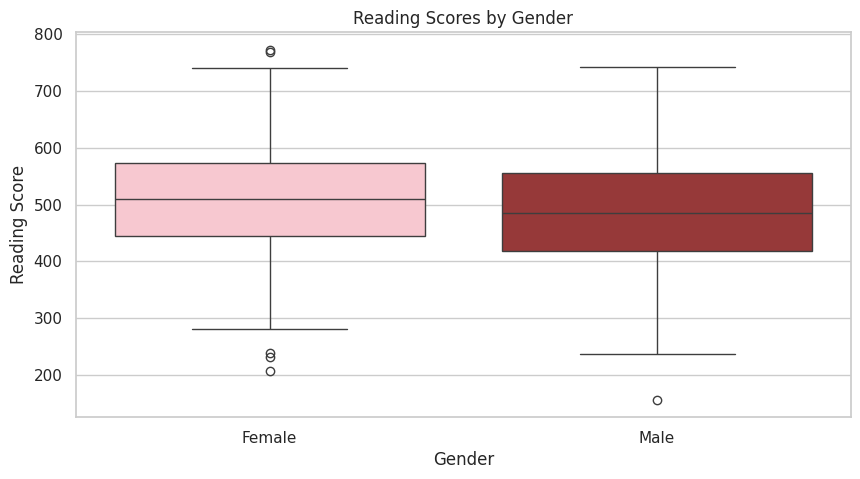

In [70]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['male'], y=df['readingScore'], palette=["pink", "brown"])
plt.xticks([0, 1], ['Female', 'Male'])
plt.title("Reading Scores by Gender")
plt.xlabel("Gender")
plt.ylabel("Reading Score")
plt.show()

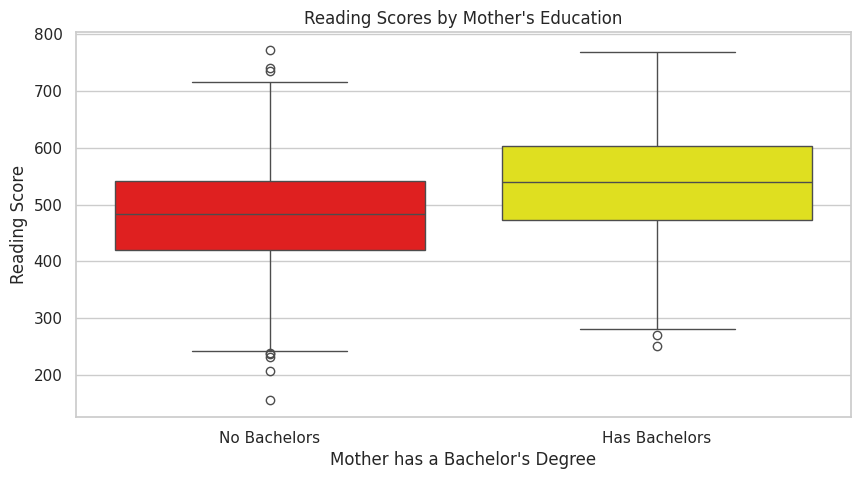

In [67]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['motherBachelors'], y=df['readingScore'], palette=["red", "yellow"])
plt.xticks([0, 1], ['No Bachelors', 'Has Bachelors'])
plt.title("Reading Scores by Mother's Education")
plt.xlabel("Mother has a Bachelor's Degree")
plt.ylabel("Reading Score")
plt.show()

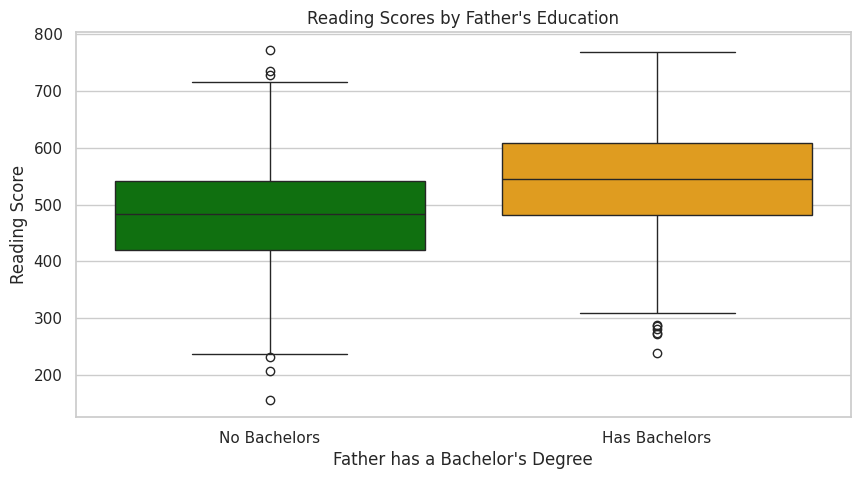

In [68]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['fatherBachelors'], y=df['readingScore'], palette=["green", "orange"])
plt.xticks([0, 1], ['No Bachelors', 'Has Bachelors'])
plt.title("Reading Scores by Father's Education")
plt.xlabel("Father has a Bachelor's Degree")
plt.ylabel("Reading Score")
plt.show()

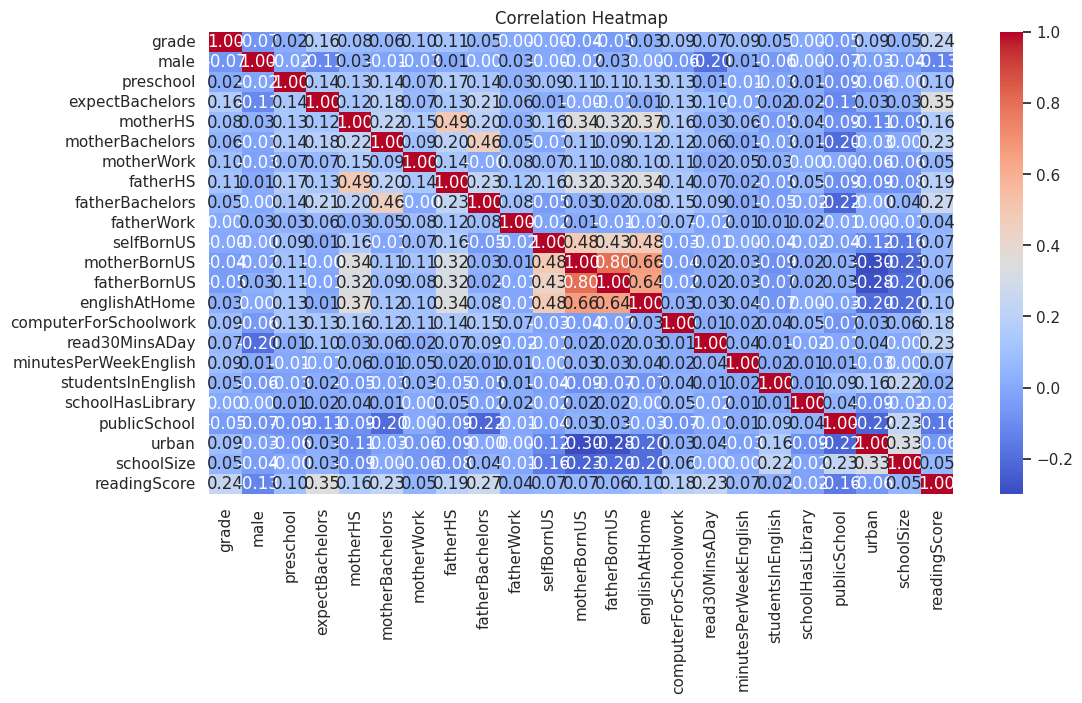

In [59]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



In [60]:
#Perform Hypothesis Testing

# 1. T-test: Comparing reading scores between males and females
male_scores = df[df['male'] == 1]['readingScore']
female_scores = df[df['male'] == 0]['readingScore']
t_stat, p_value = ttest_ind(male_scores, female_scores, equal_var=False)  # Welch's t-test

# 2. ANOVA: Testing the impact of mother's education on reading scores
group_no_bachelor = df[df['motherBachelors'] == 0]['readingScore']
group_bachelor = df[df['motherBachelors'] == 1]['readingScore']
f_stat, anova_p_value = f_oneway(group_no_bachelor, group_bachelor)

# 3. ANOVA: Testing the impact of father's education on reading scores
group_no_bachelor_father = df[df['fatherBachelors'] == 0]['readingScore']
group_bachelor_father = df[df['fatherBachelors'] == 1]['readingScore']
f_stat_father, anova_p_value_father = f_oneway(group_no_bachelor_father, group_bachelor_father)

{
    "T-test (Gender)": {"t-statistic": t_stat, "p-value": p_value},
    "ANOVA (Mother's Education)": {"F-statistic": f_stat, "p-value": anova_p_value},
    "ANOVA (Father's Education)": {"F-statistic": f_stat_father, "p-value": anova_p_value_father}
}


{'T-test (Gender)': {'t-statistic': -4.996405911022697,
  'p-value': 6.497399173037364e-07},
 "ANOVA (Mother's Education)": {'F-statistic': 86.75353035621535,
  'p-value': 4.0174184645733205e-20},
 "ANOVA (Father's Education)": {'F-statistic': 121.70823298052524,
  'p-value': 2.6234407009691776e-27}}

In [61]:
# 4. ANOVA: Impact of school size on reading scores
small_schools = df[df['schoolSize'] < df['schoolSize'].median()]['readingScore']
large_schools = df[df['schoolSize'] >= df['schoolSize'].median()]['readingScore']
f_stat_school, p_value_school = f_oneway(small_schools, large_schools)

# 5. T-test: Impact of having a school library on reading scores
library_yes = df[df['schoolHasLibrary'] == 1]['readingScore']
library_no = df[df['schoolHasLibrary'] == 0]['readingScore']
t_stat_library, p_value_library = ttest_ind(library_yes, library_no, equal_var=False)

# 6. Correlation: Study time vs. Reading score
study_time_corr = df[['minutesPerWeekEnglish', 'readingScore']].corr(numeric_only=True).iloc[0, 1]

# Display results
{
    "ANOVA (School Size)": {"F-statistic": f_stat_school, "p-value": p_value_school},
    "T-test (School Library)": {"t-statistic": t_stat_library, "p-value": p_value_library},
    "Correlation (Study Time & Reading Score)": {"Correlation Coefficient": study_time_corr}
}


{'ANOVA (School Size)': {'F-statistic': 1.4269903958825134,
  'p-value': 0.23243689984911342},
 'T-test (School Library)': {'t-statistic': -0.8718373010251432,
  'p-value': 0.3868037098830953},
 'Correlation (Study Time & Reading Score)': {'Correlation Coefficient': 0.07089251987139136}}

In [62]:
from scipy.stats import wilcoxon, chi2_contingency, spearmanr


#Wilcoxon Signed-Rank Test: Comparing study time and reading score (paired sample)
stat_wilcoxon, p_wilcoxon = wilcoxon(df['minutesPerWeekEnglish'], df['readingScore'])

# Chi-Square Test: Relationship between gender and high reading score
df['highReadingScore'] = df['readingScore'] > df['readingScore'].median()
contingency_table = pd.crosstab(df['male'], df['highReadingScore'])
stat_chi2, p_chi2, _, _ = chi2_contingency(contingency_table)

# Spearman’s Rank Correlation: Study time vs. reading score
stat_spearman, p_spearman = spearmanr(df['minutesPerWeekEnglish'], df['readingScore'])

# Returning test results
{
    "Wilcoxon Signed-Rank (Study Time & Reading Score)": {"Statistic": stat_wilcoxon, "p-value": p_wilcoxon},
    "Chi-Square (Gender & High Reading Score)": {"Statistic": stat_chi2, "p-value": p_chi2},
    "Spearman’s Correlation (Study Time & Reading Score)": {"Statistic": stat_spearman, "p-value": p_spearman}
}


{'Wilcoxon Signed-Rank (Study Time & Reading Score)': {'Statistic': 40948.0,
  'p-value': 2.923868660710588e-225},
 'Chi-Square (Gender & High Reading Score)': {'Statistic': 13.971998537358306,
  'p-value': 0.0001855536404365617},
 'Spearman’s Correlation (Study Time & Reading Score)': {'Statistic': 0.08533157968101188,
  'p-value': 0.0007128356837019801}}